In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Binarizer,StandardScaler,LabelBinarizer,OneHotEncoder

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
import dtale
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### Libraries Permitted
    Scikit-learn
    XGBoost
    NumPy
    Pandas
    SciPy
    Pickle
    Seaborn
    Matplotlib

#### Type of Columns

    'v_1': 'Binary',
    'v_26': 'Binary',
    'v_11': 'Binary',
    'v_14': 'Binary',
    'v_30': 'Binary',
    'v_28': 'Binary', 
    'v_9': 'Binary', 
    'v_27': 'Binary',
    'v_32': 'Nominal', 
    'v_4': 'Nominal',
    'v_3': 'Nominal',
    'v_20': 'Nominal',
    'v_21': 'Nominal',
    'v_18': 'Nominal',
    'v_25': 'Nominal',
    'v_12': 'Nominal', 
    'v_31': 'Ordinal',
    'v_15': 'Ordinal',
    'v_19': 'Ordinal',
    'v_13': 'Ordinal',
    'v_33': 'Ordinal',
    'v_17': 'Ordinal',
    'v_29': 'Ordinal',
    'v_23': 'Ordinal',
    'v_6': 'Ordinal', 
    'v_24': 'Ordinal', 
    'v_10': 'Ordinal', 
    'v_5': 'Ordinal',
    'v_22': 'Ordinal',
    'v_0': 'Ordinal',
    'v_16': 'Ratio',
    'v_2': 'Ratio',
    'v_8': 'Ratio',
    'v_7': 'Ratio'


#### Discrete Columns
['v_21', 'v_32', 'v_15', 'v_4', 'v_1', 'v_8', 'v_12', 'v_25', 'v_20', 'v_18', 'v_3', 'v_11', 'v_14', 'v_26', 'v_27', 'v_30', 'v_9', 'v_31', 'v_28', 'v_13', 'v_33', 'v_17', 'v_19', 'v_23', 'v_24', 'v_10', 'v_5', 'v_6', 'v_0', 'v_34', 'v_35', 'v_36', 'v_37', 'v_38', 'v_39', 'v_40', 'label']

In [260]:
dtype_info = {
    "v_1": "Binary",
    "v_26": "Binary",
    "v_11": "Binary",
    "v_14": "Binary",
    "v_30": "Binary",
    "v_28": "Binary",
    "v_9": "Binary",
    "v_27": "Binary",
    "v_32": "Nominal",
    "v_4": "Nominal",
    "v_3": "Nominal",
    "v_20": "Nominal",
    "v_21": "Nominal",
    "v_18": "Nominal",
    "v_25": "Nominal",
    "v_12": "Nominal",
    "v_31": "Ordinal",
    "v_15": "Ordinal",
    "v_19": "Ordinal",
    "v_13": "Ordinal",
    "v_33": "Ordinal",
    "v_17": "Ordinal",
    "v_29": "Ordinal",
    "v_23": "Ordinal",
    "v_6": "Ordinal",
    "v_24": "Ordinal",
    "v_10": "Ordinal",
    "v_5": "Ordinal",
    "v_22": "Ordinal",
    "v_0": "Ordinal",
    "v_16": "Ratio",
    "v_2": "Ratio",
    "v_8": "Ratio",
    "v_7": "Ratio",
}
sorted(dtype_info)

['v_0',
 'v_1',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14',
 'v_15',
 'v_16',
 'v_17',
 'v_18',
 'v_19',
 'v_2',
 'v_20',
 'v_21',
 'v_22',
 'v_23',
 'v_24',
 'v_25',
 'v_26',
 'v_27',
 'v_28',
 'v_29',
 'v_3',
 'v_30',
 'v_31',
 'v_32',
 'v_33',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9']

In [261]:
data = pd.read_pickle("../data/train.pkl")

In [51]:
# analysis = dtale.show(data, inlace=True, notebook=False)
# # plot = ordinal_data.hist(figsize=(20,15),layout=(5,4),legend=True,bins=10)
# analysis

In [133]:
discrete = data.select_dtypes(include="int64")
numeric = data.select_dtypes(include="float64")

ordinal = [i for i in dtype_info if dtype_info[i] == "Ordinal"]
nominal = [i for i in dtype_info if dtype_info[i] == "Nominal"]
binary = [i for i in dtype_info if dtype_info[i] == "Binary"]

In [136]:
def categorise_data(data):
    ordinal_data = data.loc[:,ordinal]
    nominal_data = data.loc[:,nominal]
    binary_data = data.loc[:,binary]
    return ordinal_data, nominal_data, binary_data
# ordinal_data, nominal_data, binary_data = categorise_data(data)
# ordinal_data.to_pickle('../data/ordinal_data.pkl')
# nominal_data.to_pickle('../data/nominal_data.pkl')
# binary_data.to_pickle('../data/binary_data.pkl')
ordinal_data = pd.read_pickle('../data/ordinal_data.pkl')
nominal_data = pd.read_pickle('../data/nominal_data.pkl')
binary_data = pd.read_pickle('../data/binary_data.pkl')

In [7]:
%matplotlib inline

#### Histograms of Ordinal Data
![Image](../imgs/hist_ordinal.png)

#### Histograms of Nominal Data
![Image](../imgs/hist_nominal.png)

#### Histograms of Binary Data
![Image](../imgs/hist_binary.png)

In [179]:
# data.to_pickle('../data/train.pkl')
# # data = pd.read_csv('../data/train.csv', index_col=0)

In [166]:
def separate_floating_value(ordinal_data):
    ordinal_data['decimal_values_29'] = 0
    ordinal_data['decimal_values_22'] = 0
    ordinal_data.decimal_values_22 = ordinal_data.v_22 - ordinal_data.v_22.round()
    ordinal_data.decimal_values_29 = ordinal_data.v_29 - ordinal_data.v_29.round()
    ordinal_data.v_29 = ordinal_data['v_29'].round()
    ordinal_data.v_22 = ordinal_data['v_22'].round()
    return ordinal_data

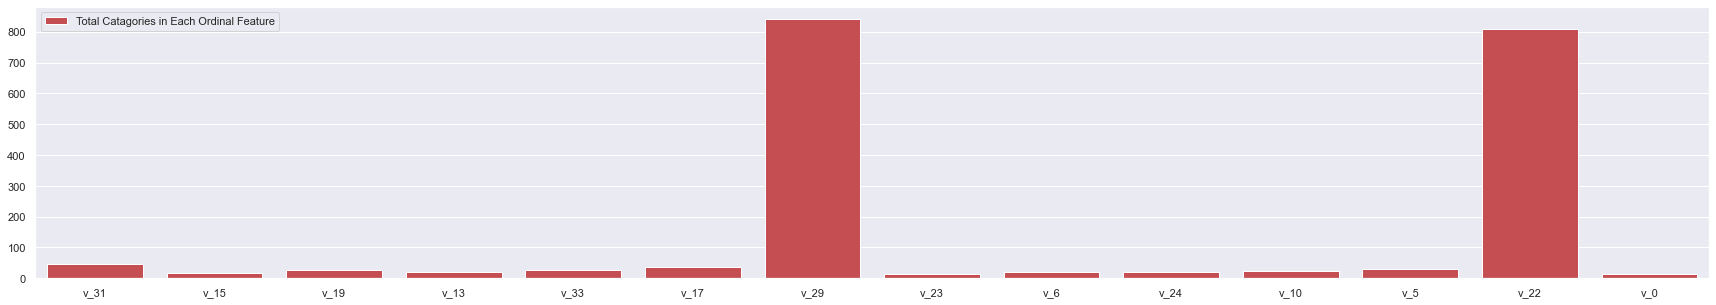

In [8]:
categorical = ordinal+nominal
oridinal_categories_total= {}
for c in ordinal:
    # print(c, len(data[c].unique()))
    oridinal_categories_total[c]=len(data[c].unique())
fig = plt.figure(figsize=(30,5))
    
fig = sns.barplot(x=ordinal,saturation=1, y=list(oridinal_categories_total.values()), label='Total Catagories in Each Ordinal Feature',color='r')
plt.legend()
# plt.table(ordinal)
plt.show()

##### After Removing the decimal Part from the features

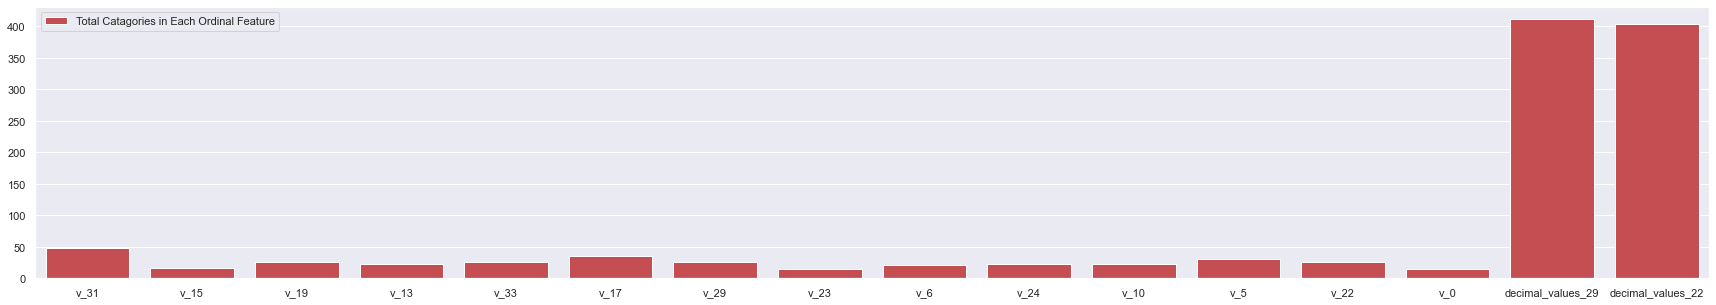

In [9]:
categorical = ordinal+nominal
oridinal_categories_total= {}
for c in ordinal_data.columns:
    # print(c, len(data[c].unique()))
    oridinal_categories_total[c]=len(ordinal_data[c].unique())
fig = plt.figure(figsize=(30,5))
    
fig = sns.barplot(x=ordinal_data.columns,saturation=1, y=list(oridinal_categories_total.values()), label='Total Catagories in Each Ordinal Feature',color='r')
# plt.table(ordinal)
# fig = plt.title
plt.xlabel = "After CLeanup"
fig = plt.legend()
fig = plt.show()

In [10]:
# pd
temp = pd.DataFrame(oridinal_categories_total,columns=oridinal_categories_total.keys(),index=['count'])
temp.style

,v_31,v_15,v_19,v_13,v_33,v_17,v_29,v_23,v_6,v_24,v_10,v_5,v_22,v_0,decimal_values_29,decimal_values_22
count,48,17,26,22,26,36,26,14,21,22,23,30,26,15,411,403


In [10]:
for c in ordinal_data.columns:
    if 'decimal' not in c:
        ordinal_data[c] = ordinal_data[c].astype(np.uint8)

In [137]:
def print_num_cat(dd):
    for c in dd.columns:
        print(c,"\t|\t", len(dd[c].unique()))
        print("-"*30)

print("Binary")
print_num_cat(binary_data)
# print("-"*30)
print("\n"*4)

print("Nominal")
print_num_cat(nominal_data)
print("\n"*4)
print("Ordinal")
print_num_cat(ordinal_data)

Binary
v_1 	|	 11
------------------------------
v_26 	|	 11
------------------------------
v_11 	|	 11
------------------------------
v_14 	|	 10
------------------------------
v_30 	|	 11
------------------------------
v_28 	|	 11
------------------------------
v_9 	|	 11
------------------------------
v_27 	|	 11
------------------------------





Nominal
v_32 	|	 84
------------------------------
v_4 	|	 98
------------------------------
v_3 	|	 124
------------------------------
v_20 	|	 98
------------------------------
v_21 	|	 22
------------------------------
v_18 	|	 95
------------------------------
v_25 	|	 80
------------------------------
v_12 	|	 37
------------------------------





Ordinal
v_31 	|	 48
------------------------------
v_15 	|	 17
------------------------------
v_19 	|	 26
------------------------------
v_13 	|	 22
------------------------------
v_33 	|	 26
------------------------------
v_17 	|	 36
------------------------------
v_29 	|	 840
-----------

In [136]:
ordinal_data.decimal_values_22[ordinal_data.decimal_values_22! = 0].shape

(2496,)

In [ ]:
fig = plt.figure(figsize=(30,10))

hm = sns.heatmap(data.corr())

In [63]:
corr_mat = data.corr()

In [ ]:
training_target = data.label
df = data.drop(['label'],axis=1)
# len(df.columns)
corr_mat

In [138]:
# others = [c for c in data.columns if '__' not in c]
def rename_with_type_label(data):
    global ordinal,nominal,binary
    rn_mp_ord = {c: f'ord__{c}' for c in ordinal}
    rn_mp_nom = {c: f'nom__{c}' for c in nominal}
    rn_mp_bin = {c: f'bin__{c}' for c in binary}
    # rn_mp_num = {c: f'bin__{c}' for c in binary}
    rn_mp_bin.update(rn_mp_nom)
    rn_mp_ord.update(rn_mp_bin)
    sorted(rn_mp_ord)

    data = data.rename(rn_mp_ord,axis=1)
    return data
data = rename_with_type_label(data)

In [71]:
others = [c for c in data.columns if '__' not in c]

other_data = data.loc[:,others]

data.columns
from collections import defaultdict


def gen_adj_list(threshold, data=data):
    adj_list = defaultdict(list)
    corr_mat = data.corr()
    for c in data.columns:
        # adj_list[c].append()
        e = list(corr_mat[corr_mat[c]>=threshold][c].index)
        e.remove(c)
        adj_list[c]=e
        # print(e)
        # break
    return adj_list

#### Correlation graph of features with correl > 0.5 at default scales
<img src="../imgs/correl_0.5.png" alt="Drawing" style="width: 1900px;height: 500px;"/>

In [195]:
medi = medi.loc[:,['v_29','v_22','decimal_values_29','decimal_values_22']]

medi_29 = medi.sort_values(by='v_29', axis=0)

medi_29.sort_values(by='v_29',inplace=True)

tempdf = pd.DataFrame()

tempdf['v_29'] = medi_29.v_29 + medi_29.decimal_values_29

tempdf['v_22'] = medi_29.v_22 + medi_29.decimal_values_22

In [139]:
from sklearn.metrics import pairwise_distances
from joblib import parallel_backend
with parallel_backend('threading'):
    r = pairwise_distances(data, metric='hamming',n_jobs=-1)
r

array([[0.        , 1.        , 0.47619048, ..., 0.95238095, 0.92857143,
        0.66666667],
       [1.        , 0.        , 1.        , ..., 0.97619048, 0.95238095,
        0.97619048],
       [0.47619048, 1.        , 0.        , ..., 0.92857143, 0.95238095,
        0.5952381 ],
       ...,
       [0.95238095, 0.97619048, 0.92857143, ..., 0.        , 0.95238095,
        0.9047619 ],
       [0.92857143, 0.95238095, 0.95238095, ..., 0.95238095, 0.        ,
        0.97619048],
       [0.66666667, 0.97619048, 0.5952381 , ..., 0.9047619 , 0.97619048,
        0.        ]])

In [107]:
def Hamming_distance(a, b):
    "Funtion to calculate hamming distance between array a and b"
    ham = 0
    for i in range(a.shape[0]):
        if a[i] != b[i]:
            ham += 1
    return ham

In [266]:
for c in ndc.columns:
    print(ndc[c].value_counts().sort_values())
    print("="*80)

168       1
75        1
57        1
73        1
76        1
       ... 
157     152
147     225
116     559
89      618
6      1222
Name: v_32, Length: 69, dtype: int64
170      1
28       1
173      1
66       1
84       2
      ... 
155    232
55     243
100    255
96     276
121    537
Name: v_4, Length: 83, dtype: int64
137      1
321      1
296      1
113      1
34       1
      ... 
31     260
39     296
44     365
70     473
87     741
Name: v_3, Length: 89, dtype: int64
163      1
244      1
38       1
139      1
75       1
      ... 
60     187
278    466
6      649
168    710
251    855
Name: v_20, Length: 72, dtype: int64
 34       1
 59       4
 13       7
-1       11
 56      20
 33      57
 9       63
 7       64
 11      66
 12      70
 5       72
 10      75
 6       75
 8       77
 4      333
 3     2801
Name: v_21, dtype: int64
72        1
127       1
259       1
126       1
260       1
       ... 
11      237
12      259
30      405
23      583
103    1102
Name: v_18

In [161]:
prediction_data = pd.read_csv('../data/test.csv',index_col=0)
prediction_data.to_pickle('../data/pred_data.pkl')

In [147]:
prediction_data.describe()

,v_21,v_32,v_15,v_4,v_1,v_8,v_12,v_25,v_20,v_18,v_3,v_11,v_14,v_26,v_27,v_30,v_9,v_31,v_28,v_13,v_33,v_17,v_19,v_29,v_23,v_24,v_10,v_5,v_6,v_22,v_0,v_7,v_2,v_16,v_34,v_35,v_36,v_37,v_38,v_39,v_40
count,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.00000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000
mean,4.893735,71.097666,11.465602,102.058968,1.677518,3.299754,19.086609,96.767199,171.600737,61.606265,68.415233,1.325553,0.842138,0.930590,1.649877,1.133292,1.027027,31.863636,0.79914,15.437346,30.039312,50.048526,23.399877,17.459929,3.909091,16.307125,26.020885,39.939189,13.204545,23.984329,12.900491,12.409091,1.997482,0.834472,5.259828,49.468673,25.963145,20.894349,30.241400,40.323096,3.245086
std,6.354640,56.517483,2.408124,44.984573,2.130889,4.469780,15.406055,78.752500,103.368968,53.562517,49.187194,2.133737,2.182575,2.158609,2.088754,2.121983,2.112219,7.538295,2.06551,3.119285,3.250973,4.651411,3.627787,5.314244,2.248068,2.810381,3.002487,4.606119,3.681453,5.697578,2.159281,3.416760,2.475053,3.145214,3.611350,29.481917,14.984396,11.663796,17.931066,22.777727,2.684748
min,3.000000,6.000000,10.000000,9.000000,0.000000,1.000000,16.000000,1.000000,6.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.00000,14.000000,23.000000,41.000000,18.000000,6.000000,3.000000,15.000000,19.000000,31.000000,8.000000,13.000000,12.000000,7.600000,-0.800000,-4.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,6.000000,10.000000,59.000000,1.000000,1.000000,16.000000,5.000000,60.000000,23.000000,39.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,27.000000,0.00000,14.000000,29.000000,48.000000,21.000000,17.000000,3.000000,15.000000,25.000000,37.000000,11.000000,24.000000,12.000000,9.400000,0.450000,-1.700000,2.000000,23.750000,13.000000,11.000000,15.000000,21.000000,1.000000
50%,3.000000,89.000000,10.000000,102.000000,1.000000,1.000000,16.000000,110.000000,175.000000,37.000000,70.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,29.000000,0.00000,14.000000,29.000000,49.000000,24.000000,18.500000,3.000000,15.000000,25.000000,39.000000,13.000000,25.500000,12.000000,12.400000,1.400000,0.790000,5.000000,49.000000,26.000000,21.000000,30.000000,40.000000,3.000000
75%,4.000000,116.000000,12.000000,148.000000,1.000000,3.000000,16.000000,181.000000,251.000000,103.000000,87.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,34.000000,0.00000,15.000000,30.000000,52.000000,25.000000,19.857143,3.000000,15.000000,27.000000,42.000000,15.000000,27.000000,12.000000,15.500000,2.800000,2.020000,8.000000,76.000000,39.000000,31.000000,46.000000,60.000000,5.000000
max,65.000000,176.000000,22.000000,176.000000,10.000000,24.000000,172.000000,274.000000,324.000000,318.000000,441.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,68.000000,10.00000,36.000000,49.000000,86.000000,44.000000,30.857143,17.000000,33.000000,42.000000,63.000000,30.000000,38.692308,26.000000,25.200000,12.700000,12.510000,18.000000,108.000000,58.000000,49.000000,69.000000,87.000000,14.000000


In [150]:
data.describe()

,v_21,v_32,v_15,v_4,v_1,v_8,v_12,v_25,v_20,v_18,v_3,v_11,v_14,v_26,v_27,v_30,v_9,v_31,v_28,v_13,v_33,v_17,v_19,v_29,v_23,v_24,v_10,v_5,v_6,v_22,v_0,v_7,v_2,v_16,v_34,v_35,v_36,v_37,v_38,v_39,v_40,label
count,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.00000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.00000
mean,4.817439,70.825606,11.609062,99.329294,1.737882,3.436249,18.970495,97.203372,166.138567,57.441254,65.922023,1.431243,0.83588,0.973130,1.755532,1.227081,1.089831,32.134089,0.845100,15.600896,30.127239,50.165701,23.562171,17.506418,3.975764,16.392255,26.064015,39.934932,13.281876,24.121478,12.998156,12.394810,2.041333,0.835901,5.341149,50.674658,26.212065,20.837197,31.276607,40.210485,3.278978,0.85432
std,6.166860,56.110329,2.576362,45.017380,2.163671,4.577644,15.010042,79.213308,103.121322,50.416264,43.698147,2.281682,2.10919,2.187716,2.221415,2.242849,2.209357,7.887596,2.132188,3.216409,3.256676,4.670733,3.757691,5.346593,2.249038,2.866872,3.079682,4.507494,3.674661,5.677114,2.309686,3.414303,2.516779,3.109413,3.507388,29.330820,14.929649,11.984063,17.847942,22.466458,2.618851,0.69866
min,3.000000,6.000000,9.000000,9.000000,0.000000,1.000000,16.000000,1.000000,6.000000,3.000000,5.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,14.000000,23.000000,41.000000,18.000000,6.000000,3.000000,15.000000,19.000000,31.000000,8.000000,13.000000,12.000000,7.600000,-0.800000,-4.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,6.000000,10.000000,55.000000,1.000000,1.000000,16.000000,5.000000,60.000000,23.000000,39.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,27.000000,0.000000,14.000000,29.000000,48.000000,22.000000,17.200000,3.000000,15.000000,25.000000,37.000000,11.000000,24.000000,12.000000,9.400000,0.500000,-1.700000,3.000000,25.000000,13.000000,11.000000,16.000000,21.750000,1.000000,0.00000
50%,3.000000,89.000000,10.000000,101.000000,1.000000,1.000000,16.000000,110.000000,168.000000,30.000000,70.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,29.000000,0.000000,14.000000,29.000000,49.000000,24.000000,18.571429,3.000000,15.000000,25.000000,39.000000,13.000000,25.500000,12.000000,12.400000,1.400000,0.790000,5.000000,50.000000,26.000000,21.000000,31.000000,41.000000,3.000000,1.00000
75%,4.000000,116.000000,12.000000,146.000000,1.000000,3.000000,16.000000,181.000000,251.000000,103.000000,87.000000,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,35.000000,0.000000,16.000000,31.000000,53.000000,25.000000,20.000000,3.000000,16.000000,27.000000,42.000000,15.000000,27.000000,12.000000,14.900000,2.800000,2.020000,8.000000,76.000000,39.000000,31.000000,47.000000,59.000000,5.000000,1.00000
max,61.000000,176.000000,25.000000,176.000000,10.000000,25.000000,179.000000,289.000000,322.000000,324.000000,428.000000,10.000000,9.00000,10.000000,10.000000,10.000000,10.000000,78.000000,10.000000,38.000000,49.000000,86.000000,45.000000,31.111111,17.000000,37.000000,42.000000,64.000000,28.000000,38.000000,26.000000,25.200000,12.700000,12.510000,18.000000,107.000000,58.000000,49.000000,69.000000,87.000000,14.000000,2.00000


In [146]:
pd.options.display.max_columns = 50

In [151]:
ordinal_data_test, nominal_data_test, binary_data_test = categorise_data(prediction_data)

In [154]:
# training_categories= [ordinal_data_test, nominal_data_test, binary_data_test]
# testing_categories= [ordinal_data, nominal_data, binary_data]
cat_diff = {}
for c in data.columns:
    if 
# np.setdiff1d(ordinal_data['v_31'].unique(),ordinal_data_test['v_31'].unique())

array([66, 69, 70, 76, 78])

In [163]:
def int_compress(df):
    int64_data = df.select_dtypes(include='int64')
    i64_cols = list(int64_data.columns)
    df.loc[:,i64_cols] = df.loc[:,i64_cols].astype(np.int16)
    return df
data = int_compress(data)
prediction_data = int_compress(prediction_data)

In [179]:
# prediction_data.info()
cat_diff = {}
cate = list(data.select_dtypes(include='int16').columns)
for c in cate:
    if c =='label':
        continue
    train_dat_cat = data[c].unique()
    test_dat_cat = prediction_data[c].unique()
    n_cat_train = data[c].value_counts()
    s = 0
    for cst in np.setdiff1d(train_dat_cat,test_dat_cat):
        s+= n_cat_train[cst]
    cat_diff[c] = (np.setdiff1d(train_dat_cat,test_dat_cat).shape[0], s,train_dat_cat.shape[0]-test_dat_cat.shape[0])

In [180]:
# sorted(cat_diff)
cat_diff

{'v_21': (7, 11, 4),
 'v_32': (16, 31, 12),
 'v_15': (4, 10, 4),
 'v_4': (16, 60, 16),
 'v_1': (0, 0, 0),
 'v_8': (1, 1, 1),
 'v_12': (12, 16, 6),
 'v_25': (25, 45, 18),
 'v_20': (27, 51, 15),
 'v_18': (26, 47, 12),
 'v_3': (36, 74, 17),
 'v_11': (0, 0, 0),
 'v_14': (0, 0, -1),
 'v_26': (0, 0, 0),
 'v_27': (0, 0, 0),
 'v_30': (0, 0, 0),
 'v_9': (0, 0, 0),
 'v_31': (5, 8, 5),
 'v_28': (0, 0, 0),
 'v_13': (2, 4, 0),
 'v_33': (2, 2, 1),
 'v_17': (6, 10, 6),
 'v_19': (1, 1, 1),
 'v_23': (0, 0, 0),
 'v_24': (3, 4, 3),
 'v_10': (1, 3, 0),
 'v_5': (2, 5, 1),
 'v_6': (0, 0, -1),
 'v_0': (2, 4, 2),
 'v_34': (0, 0, 0),
 'v_35': (4, 20, 3),
 'v_36': (0, 0, 0),
 'v_37': (1, 1, 1),
 'v_38': (2, 4, 2),
 'v_39': (0, 0, 0),
 'v_40': (0, 0, 0)}

In [192]:
star = (0,0,0)
rats = ordinal + nominal + binary
for n in cat_diff:
    if n not in rats:
        try:
            x, y, z = cat_diff[n]
            a,b,c = star
            star = a+x, b+y, c+z
        except:
            continue

In [193]:
star

(8, 26, 7)

nominal = (165, 335, 100)<br>
ordinal = (28, 51, 22)<br>
unk = (8,26,7)


In [194]:
for c in ordinal:
    print(c, data[c].min(), prediction_data[c].min())

v_31 25 25
v_15 9 10
v_19 18 18
v_13 14 14
v_33 23 23
v_17 41 41
v_29 6.0 6.0
v_23 3 3
v_6 8 8
v_24 15 15
v_10 19 19
v_5 31 31
v_22 13.0 13.0
v_0 12 12


In [195]:
for c in ordinal:
    print(c, data[c].max(), prediction_data[c].max())

v_31 78 68
v_15 25 22
v_19 45 44
v_13 38 36
v_33 49 49
v_17 86 86
v_29 31.11111111111111 30.857142857142858
v_23 17 17
v_6 28 30
v_24 37 33
v_10 42 42
v_5 64 63
v_22 38.0 38.69230769230769
v_0 26 26


In [234]:
ffd_bin = {}
def ff_dist_c(i, j):
    global data, prediction_data
    fvf_dist_1 = prediction_data.groupby(i)[j].value_counts().unstack().fillna(0).to_numpy()
    fvf_dist_2 = data.groupby(i)[j].value_counts().unstack().fillna(0).to_numpy()
    if fvf_dist_1.shape[1] != fvf_dist_2.shape[1]:
        dumb_c = np.zeros(11)
        fvf_dist_2 = np.c_[fvf_dist_2, dumb_c]
    if fvf_dist_1.shape[0] != fvf_dist_2.shape[0]:
        dumb_c = np.zeros(11).reshape(1,11)
        fvf_dist_2 = np.r_[fvf_dist_2, dumb_c]
    return fvf_dist_1 + fvf_dist_2
for c in binary:
    master_fvf_dist = None
    for cc in binary:
        if c!=cc:
            tm = ff_dist_c(c,cc)
            if type(master_fvf_dist) == np.ndarray:
                master_fvf_dist = master_fvf_dist + tm
            else:
                master_fvf_dist = tm
    ffd_bin[c] = master_fvf_dist

In [242]:
np.printoptions(suppress=False)
# print(list(ffd_bin['v_11']))
for r in list(ffd_bin['v_11']):
    print(r)

[9077. 4957.   30.   27.   29.   30.   23.   24.   30.   15.   10.]
[10806.  6297.    77.    63.    70.    65.    66.    63.    74.    73.
    28.]
[46. 55. 78. 85. 77. 65. 83. 73. 63. 73. 30.]
[49. 54. 59. 69. 83. 64. 59. 70. 73. 71. 28.]
[48. 68. 56. 61. 73. 74. 85. 81. 69. 56. 22.]
[33. 64. 57. 70. 74. 65. 72. 50. 65. 61. 19.]
[44. 67. 61. 55. 68. 68. 60. 82. 74. 71. 15.]
[54. 65. 75. 80. 72. 68. 58. 74. 74. 71. 23.]
[50. 69. 73. 66. 83. 62. 58. 76. 64. 70. 29.]
[52. 74. 81. 86. 83. 72. 62. 82. 86. 79. 41.]
[26. 42. 30. 43. 50. 47. 44. 38. 48. 48. 11.]


### Inherently multiclass:

    naive_bayes.BernoulliNB

    tree.DecisionTreeClassifier

    tree.ExtraTreeClassifier

    ensemble.ExtraTreesClassifier

    naive_bayes.GaussianNB

    neighbors.KNeighborsClassifier

    semi_supervised.LabelPropagation

    semi_supervised.LabelSpreading

    discriminant_analysis.LinearDiscriminantAnalysis

    svm.LinearSVC (setting multi_class=”crammer_singer”)

    linear_model.LogisticRegression (setting multi_class=”multinomial”)

    linear_model.LogisticRegressionCV (setting multi_class=”multinomial”)

    neural_network.MLPClassifier

    neighbors.NearestCentroid

    discriminant_analysis.QuadraticDiscriminantAnalysis

    neighbors.RadiusNeighborsClassifier

    ensemble.RandomForestClassifier

    linear_model.RidgeClassifier

    linear_model.RidgeClassifierCV

### Multiclass as One-Vs-One:

    svm.NuSVC

    svm.SVC.

    gaussian_process.GaussianProcessClassifier (setting multi_class = “one_vs_one”)

### Multiclass as One-Vs-The-Rest:

    ensemble.GradientBoostingClassifier

    gaussian_process.GaussianProcessClassifier (setting multi_class = “one_vs_rest”)

    svm.LinearSVC (setting multi_class=”ovr”)

    linear_model.LogisticRegression (setting multi_class=”ovr”)

    linear_model.LogisticRegressionCV (setting multi_class=”ovr”)

    linear_model.SGDClassifier

    linear_model.Perceptron

    linear_model.PassiveAggressiveClassifier



In [253]:
from sklearn.preprocessing import OneHotEncoder
v_elim = {}
for c in nominal:
    train_dat_cat = data[c].unique()
    test_dat_cat = prediction_data[c].unique()
    v_elim [c] = np.setdiff1d(train_dat_cat, test_dat_cat)
    

In [263]:
ndc = nominal_data.copy()
for c in nominal:
    for el in v_elim[c]:
        set_idx= ndc[ndc[c]==el].index
        ndc.loc[set_idx,c ] = -1

In [264]:
ndc

,v_32,v_4,v_3,v_20,v_21,v_18,v_25,v_12
id,,,,,,,,
0,6,55,17,60,3,30,5,16
1,94,65,-1,173,8,-1,4,22
2,166,155,31,-1,3,30,1,16
3,6,121,70,6,3,23,1,16
4,-1,21,44,168,4,106,118,22
...,...,...,...,...,...,...,...,...
3791,89,102,17,6,3,23,1,16
3792,8,130,44,10,7,29,6,25
3793,168,59,42,174,5,28,1,23


In [ ]:
OneHotEncoder()